## ADALINE
* https://en.wikipedia.org/wiki/ADALINE

### ADALINE vs. Perceptron
* https://sebastianraschka.com/faq/docs/diff-perceptron-adaline-neuralnet.html    

### 퍼셉트론 학습
* http://untitledtblog.tistory.com/27

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, node=2):
        self.W = np.random.rand(node + 1)
        self.node = node
        
    def unit_f(self, net):
        return 1 if net >= 0 else 0
        
    def show(self):
        print("W: " + str(self.W))
        
    def train(self, X, T, lr=0.05, verbose=False, maxIter=100):
        ones_2d = np.ones((X.shape[0], 1))
        X = np.hstack((ones_2d, X))
        self.show()
        keep_training = True
        i = 0
        
        while keep_training and i < maxIter:
            keep_training = False
            print("Epoch: " + str(i+1))
            
            for (x, t) in zip(X, T):
                net = np.sum(self.W * x)
                y = self.unit_f(net)
                if y != t:
                    keep_training = True           # 출력과 값이 다르면.. true 출력
                    self.W = self.W + lr*x*(t-y)
                    print("\t<<Weights Updated>>")
                    print("\t\tW: " + str(self.W))
            
            i += 1
            
    def predict(self, x):
        x = np.hstack((1, x))
        return self.unit_f(np.sum(self.W * x))

In [2]:
p_AND = Perceptron()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T_AND = np.array([0, 0, 0, 1])

In [25]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [26]:
p_AND

In [27]:
T_AND

array([0, 0, 0, 1])

In [3]:
p_AND.show()

W: [0.74692209 0.05470077 0.68024035]


In [4]:
p_AND.train(X, T_AND)

W: [0.74692209 0.05470077 0.68024035]
Epoch: 1
	<<Weights Updated>>
		W: [0.69692209 0.05470077 0.68024035]
	<<Weights Updated>>
		W: [0.64692209 0.05470077 0.63024035]
	<<Weights Updated>>
		W: [0.59692209 0.00470077 0.63024035]
Epoch: 2
	<<Weights Updated>>
		W: [0.54692209 0.00470077 0.63024035]
	<<Weights Updated>>
		W: [0.49692209 0.00470077 0.58024035]
	<<Weights Updated>>
		W: [ 0.44692209 -0.04529923  0.58024035]
Epoch: 3
	<<Weights Updated>>
		W: [ 0.39692209 -0.04529923  0.58024035]
	<<Weights Updated>>
		W: [ 0.34692209 -0.04529923  0.53024035]
	<<Weights Updated>>
		W: [ 0.29692209 -0.09529923  0.53024035]
Epoch: 4
	<<Weights Updated>>
		W: [ 0.24692209 -0.09529923  0.53024035]
	<<Weights Updated>>
		W: [ 0.19692209 -0.09529923  0.48024035]
	<<Weights Updated>>
		W: [ 0.14692209 -0.14529923  0.48024035]
Epoch: 5
	<<Weights Updated>>
		W: [ 0.09692209 -0.14529923  0.48024035]
	<<Weights Updated>>
		W: [ 0.04692209 -0.14529923  0.43024035]
Epoch: 6
	<<Weights Updated>>
		W: [

In [5]:
p_AND.predict([0.21, 0.1])

0

In [6]:
p_OR = Perceptron()
T_OR = np.array([0, 1, 1, 1])
p_OR.train(X, T_OR, lr=0.1)

W: [0.62509492 0.78578288 0.96375242]
Epoch: 1
	<<Weights Updated>>
		W: [0.52509492 0.78578288 0.96375242]
Epoch: 2
	<<Weights Updated>>
		W: [0.42509492 0.78578288 0.96375242]
Epoch: 3
	<<Weights Updated>>
		W: [0.32509492 0.78578288 0.96375242]
Epoch: 4
	<<Weights Updated>>
		W: [0.22509492 0.78578288 0.96375242]
Epoch: 5
	<<Weights Updated>>
		W: [0.12509492 0.78578288 0.96375242]
Epoch: 6
	<<Weights Updated>>
		W: [0.02509492 0.78578288 0.96375242]
Epoch: 7
	<<Weights Updated>>
		W: [-0.07490508  0.78578288  0.96375242]
Epoch: 8


In [7]:
print(p_OR.predict([0, 1]))
print(p_OR.predict([0.1, 0.9]))

1
1


In [8]:
print(p_OR.predict([0.0, 0.0]))

0


In [9]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T_AND = np.array([0, 0, 0, 1])
W = np.random.rand(X.shape[1]+1)
lr = 0.05
maxIter = 100

In [10]:
print(W)

[0.72388349 0.28637588 0.05669812]


In [11]:
ones_2d = np.ones((X.shape[0], 1))

In [12]:
X1 = np.hstack((ones_2d, X))

In [13]:
# 1. 입력 x와 W를 내적
net = np.sum(X1[0] * W)

In [14]:
y = 1 if net >=0 else 0

In [15]:
if y != T_AND[0]:
    #keep_training = True        
    W = W + lr*X1[0]*(T_AND[0] - y)
    print("학습중...")

학습중...


In [21]:
i = 0
keep_training = True
while keep_training and i < maxIter:
    keep_training = False
    print("Epoch: " + str(i+1))
    
    for (x, t) in zip(X1, T_AND):
        net = np.sum(W*x)
        y = 1 if net >=0 else 0
        
        if y != t:
            keep_training = True
            print("가중치 업데이트 중...")
            W = W + lr*x*(t - y)
    i += 1

Epoch: 1


In [22]:
print(W)

[-0.12611651  0.08637588  0.05669812]


In [23]:
def predict(W, x):
    x = np.hstack((1, x))
    net = W.dot(x)
    return 1 if net >= 0 else 0

In [24]:
predict(W, [0.91, 1.03])

1

In [28]:
## 70p 계단 함수의 그래프

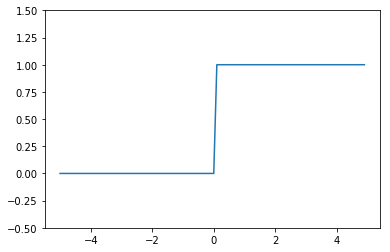

In [33]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.5, 1.5)
plt.show()

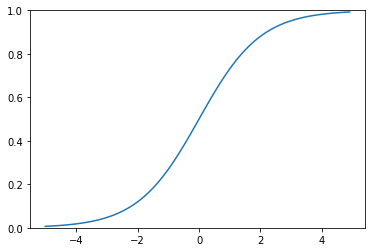

In [36]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0, 1)
plt.show()

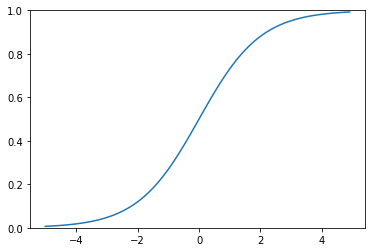

In [37]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0, 1)
plt.show()

In [38]:

import numpy as np

In [41]:
A = np.array([1,2,3,4])

In [42]:
A

array([1, 2, 3, 4])

In [44]:
A.shape

(4,)

In [45]:
np.shape(A)

(4,)

In [46]:
np.ndim(A)

1

In [47]:
A.ndim

1

In [54]:
A.shape[0]

4

In [55]:
B = np.array([[1,2],[3,4],[5,6]]); B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [56]:
print(B.ndim)

2


In [57]:
print(np.ndim(B))

2


In [59]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

In [60]:
print(np.dot(A,B))
print(A.dot(B))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
